# Regression with TensorFlow

### Ahmed J. Zerouali (2021/08/19)

This notebook explores a regression example with TensorFlow 2.0. It is based on Lectures 137-140 in Section 25 of the DSML Bootcamp. 

The example studied here aims to predict the price of house from a series of features. 

## Contents

1) Exploratory Data Analysis

2) Feature Engineering

3) Regression with TensorFlow

4) Prediction and Evaluation


____________

## 1) Exploratory Data Analysis

Here starts Lecture 137.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I'm still not sure about what this does exactly...
%matplotlib inline

### a) Exploratory Data Analysis

* Load "kc_house_data". This is a real data set from Kaggle (https://www.kaggle.com/harlfoxem/housesalesprediction). 

In [3]:
df_houses = pd.read_csv("kc_house_data.csv")

In [4]:
df_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


* Pierian Data's notebook contains a description of the features above:

    * id - Unique ID for each home sold
    * date - Date of the home sale
    * price - Price of each home sold
    * bedrooms - Number of bedrooms
    * bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
    * sqft_living - Square footage of the apartments interior living space
    * sqft_lot - Square footage of the land space
    * floors - Number of floors
    * waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
    * view - An index from 0 to 4 of how good the view of the property was
    * condition - An index from 1 to 5 on the condition of the apartment,
    * grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
    * sqft_above - The square footage of the interior housing space that is above ground level
    * sqft_basement - The square footage of the interior housing space that is below ground level
    * yr_built - The year the house was initially built
    * yr_renovated - The year of the house’s last renovation
    * zipcode - What zipcode area the house is in
    * lat - Lattitude
    * long - Longitude
    * sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
    * sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


* This data set has no missing entries:

<AxesSubplot:>

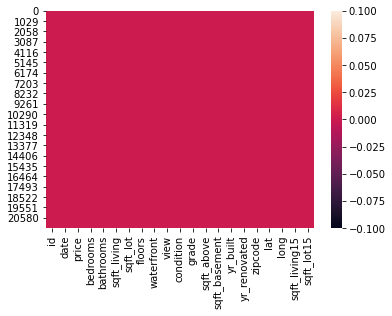

In [5]:
sns.heatmap(df_houses.isnull())

In [7]:
df_houses.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [8]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Other than the date of house sales, all other efeatures are numerical, so there's no categorical data.

* Let's look at the distribution of prices (in million dollars):

<AxesSubplot:xlabel='price', ylabel='Count'>

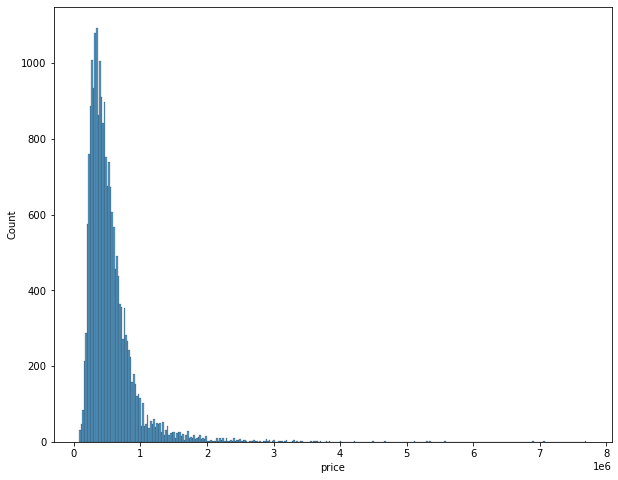

In [10]:
plt.figure(figsize=(10,8))
sns.histplot(df_houses["price"])

In [11]:
df_houses["price"].min()

78000.0

In [12]:
df_houses["price"].max()

7700000.0

In [13]:
df_houses["price"].mean()

540296.5735055795

* Portilla mentions that it would be reasonable to remove outliers before building the model (e.g. remove houses with prices above \$3M).

* Try to identify features most correlated to the price. Let's explore *df_houses.corr()*:

<AxesSubplot:>

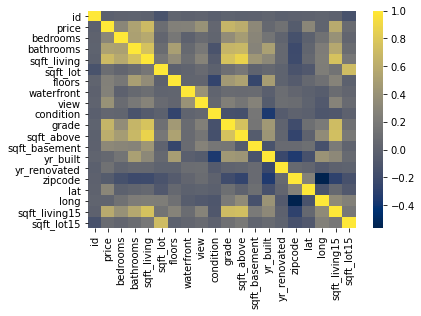

In [23]:
sns.heatmap(df_houses.corr(), cmap = "cividis")

In [28]:
df_houses.corr()["price"]

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

<AxesSubplot:>

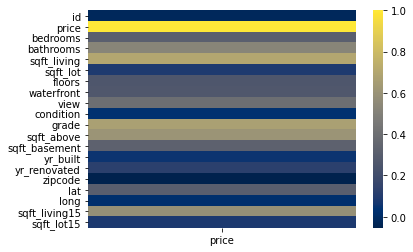

In [26]:
# Portilla looks at values
sns.heatmap(df_houses.corr()[["price"]], cmap = "cividis")

* The price is most correlated to the "grade" and the surface areas ("sqft_area" is highest).
* An interesting fact is that the number of bathrooms has a higher correlation than the numbder of bedrooms.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

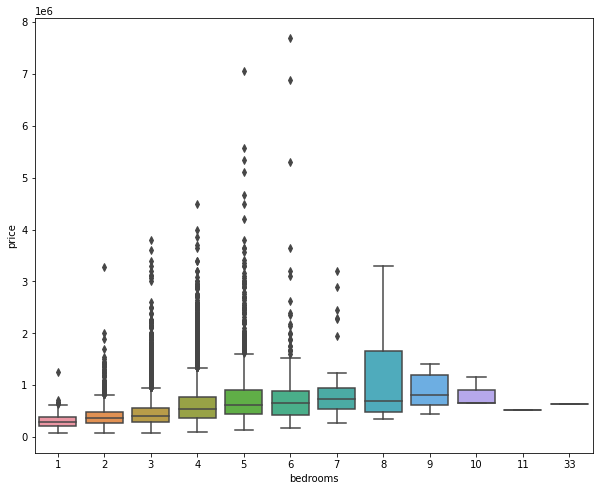

In [29]:
plt.figure(figsize=(10,8))
sns.boxplot(x="bedrooms", y="price", data=df_houses)

* There's a house with 33 bedrooms. It must the 7.7mil one.

* Among the features are the "lat(itude)" and "long(itude)", i.e. the coordinates of the houses. This should give an idea of the geographical distribution of prices.

* Portilla looks at scatterplots of prices vs "lat" and vs "long". It would be useful to plot a heatmap of price in terms both these variables

* My guess is to use a jointplot with prices as hue and *(x,y)=(lon,lat)*, but this crashes Python since this function computes a distribution. It's more approriate to use **sns.scatterplot()** for this task.

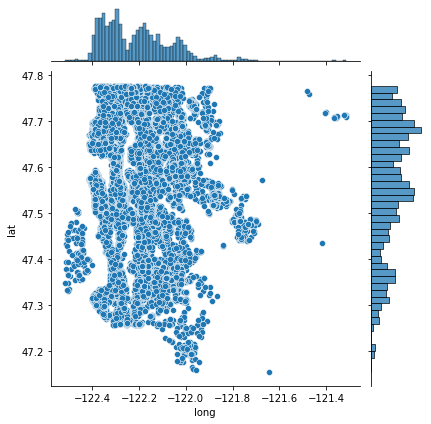

In [33]:
sns.jointplot(x="long", y="lat", data = df_houses)

<AxesSubplot:xlabel='long', ylabel='lat'>

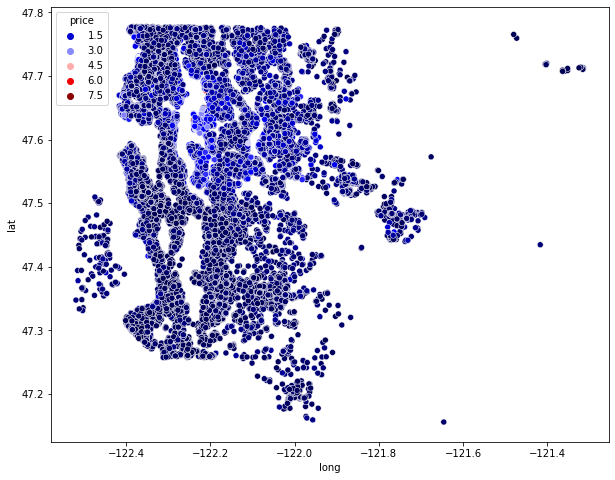

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="long", y="lat", data = df_houses, hue = "price", palette = "seismic" )

* This map is hard to read because of the color coding induced by the outliers.

* To address this issues, Portilla suppresses the top 1% of prices.

In [42]:
df_houses.sort_values(by = "price", ascending =False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


* The first 25 highest house prices seems to contain all outliers:

In [47]:
df_houses.sort_values(by = "price", ascending =False)["price"].iloc[:25]

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
1313     5300000.0
1162     5110000.0
8085     4670000.0
2624     4500000.0
8629     4490000.0
12358    4210000.0
4145     4000000.0
2083     3850000.0
7028     3800000.0
19002    3800000.0
16288    3710000.0
18467    3650000.0
6502     3650000.0
15241    3640000.0
19133    3640000.0
2862     3600000.0
21560    3570000.0
5874     3420000.0
10435    3400000.0
13954    3400000.0
Name: price, dtype: float64

In [48]:
df_hous_cut = df_houses.sort_values(by = "price", ascending =False).iloc[26:]

In [49]:
df_hous_cut

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20444,9808100150,4/2/2015,3350000.0,5,3.75,5350,15360,1.0,0,1,...,11,3040,2310,2008,0,98004,47.6480,-122.218,3740,15940
14070,3625059043,9/4/2014,3300000.0,5,4.75,6200,13873,2.0,1,4,...,11,4440,1760,1989,0,98008,47.6050,-122.112,2940,13525
18462,1346300150,10/20/2014,3300000.0,8,4.00,7710,11750,3.5,0,0,...,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325
18185,3625059152,12/30/2014,3300000.0,3,3.25,4220,41300,1.0,1,4,...,11,2460,1760,1958,1987,98008,47.6083,-122.110,3810,30401
18288,6072800246,7/2/2014,3300000.0,5,6.25,8020,21738,2.0,0,0,...,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


<AxesSubplot:xlabel='long', ylabel='lat'>

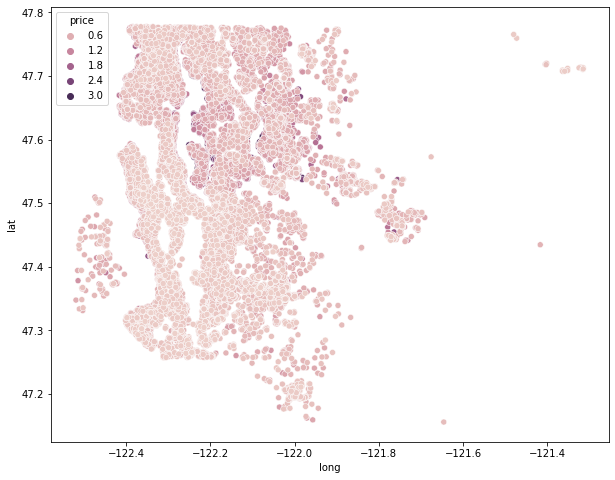

In [51]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="long", y="lat", data = df_hous_cut, hue = "price", palette = "seismic" )

In [53]:
# Remove top 1% of the highest prices. Here 1% is 215 entries
df_houses_99 = df_houses.sort_values(by = "price", ascending = False)[216:]

* This cleans up the data a little bit, and to see a better visualization, it's good to use a lower *alpha* and tricolor *palette*:

<AxesSubplot:xlabel='long', ylabel='lat'>

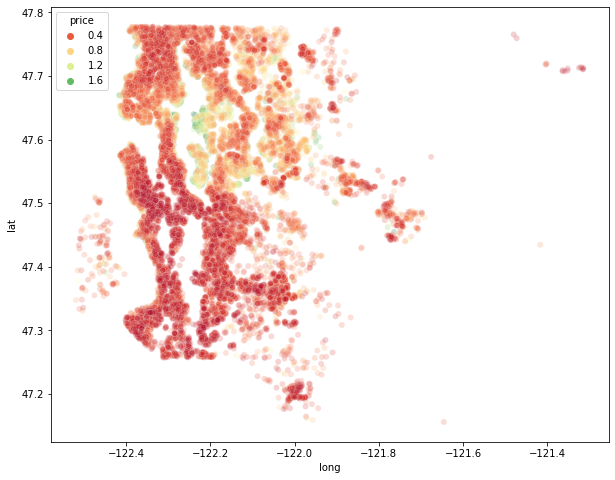

In [58]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="long", y="lat", data = df_houses_99, hue = "price", alpha = 0.2, palette="RdYlGn")

_____________________

## 2) Feature Engineering

Here is a summary of Lecture 138. In this part we modify the features for future model construction. We use the considerations below:

* Portilla does the following:
    * Removes the ID
    * Convert the date to a datetime object
    
* Looks at whether or not the month in which a house is sold has substantial influence on the price. It turns out that there's barely a $5k difference between min and maxes.

* Next problematic feature is the zipcode, which is in fact a categorical variable. There's 70 different zipcodes in total, which is too much to convert into dummy variables. We'll just drop it for the sake of clarity, because an in-depth treatment in this feature would require knowing much more about King County.

* Another troublesome feature of this data set is the year of renovation. Many entries have 0 (non-renovated), which suggests that we could turn this into categorical dummy variables. However, Portilla suggests that since a recently renovated house should have  higher price, and since 0 is lower than all other year values, we could just leave this feature as it is.

* A similar reasoning applies to the "sqft_basement" feature, where 0 means that there's no basement. So we'll leave it as a continuous feature too.

In [59]:
df_houses_99

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [60]:
df_houses_99.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [61]:
df_houses_99 = df_houses_99.drop(labels = ["id","date", "zipcode"], axis = 1)

* The "view", "condition" and "grade" features are all scores. The last 2 are not specified by dummy variables.

**Comment:** By feature engineering, Portilla means the process of digging deeper into the relevance of the features of the data set. For this dataset, he converts the selling dates into numerical quantities and looks at some statistical plots to decide whether it is a relevant feature or not.

___________________________


## 3) Regression with TensorFlow

This is Lecture 139. 

### a) Data pre-processing

We split our data set into training and test data. Since we're working with TensorFlow/Keras, we'll apply *train_test_split* to the Numpy arrays underlying *df_houses_99* (which we obtain using the **pd.DataFrame.values** attribute).

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df_houses_99.drop(labels = "price", axis = 1).values
y = df_houses_99["price"].values

In [70]:
[ X_train, X_test, y_train, y_test] = train_test_split(X,y, test_size =0.3, random_state=101)

* Import MinMaxScaler and create scaler object to normalize the data.

In [71]:
from sklearn.preprocessing import MinMaxScaler

houses_scaler = MinMaxScaler()

* Fit the scaler to the training data, then use resulting object to scale the data set:

In [72]:
houses_scaler.fit(X_train)

X_train = houses_scaler.transform(X_train)

#X_train = houses_scaler.fit_transform(X_train)

X_test = houses_scaler.transform(X_test)

* **Remark:** The fit and transform can be combined into one step with **MinMaxScaler.fit_transform()**.
* **Is there a way to save the trained scaler? I don't see such a method in the documentation.**


In [105]:
houses_scaler.get_params()

{'clip': False, 'copy': True, 'feature_range': (0, 1)}

### b) Building the neural net



In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [74]:
X_train.shape

(14966, 17)

* The network constructed next has:
    * An input layer with 17 neurons, all with "relu" activations (Portilla has 19 features).
    * 2 Hidden layers with 17 neurons and same activations as above (Portilla makes 3 of those).
    * An output layer with one neuron and linear activation.
    * For compilation, we'll use the ADAM optimization algorithm and MSE loss function (just like lectures).

In [76]:
# Create instance
nn_houses = Sequential()

# Input layer
nn_houses.add(Dense(units = 17, activation= "relu"))

# Hidden layers
nn_houses.add(Dense(units = 17, activation= "relu"))
nn_houses.add(Dense(units = 17, activation= "relu"))

# Output layer
nn_houses.add(Dense(units = 1))

# Compile model
nn_houses.compile(optimizer="adam", loss = "mse")

### c) Training the neural network

* This time Portilla shows functionalities with other arguments of **Sequential.fit()**:
    * We can pass-in the test data for reference during training, which will keep track of losses and avoid overfitting. This is done with the **validation_data=*(X_test, y_test)*** parameter
    * We set batch sizes for training since this data set is rather large, with the parameter **batch_size**. Typically we take powers of 2 for batch sizes. the smaller the batch the longer the training, but the less overfitting will occur.
    * We'll take 400 epochs here. Portilla mentions that early stopping mechanisms are discussed in later lectures.

In [79]:
nn_houses.fit(X_train, y_train, \
              validation_data= (X_test, y_test), \
              batch_size =  128, \
              epochs = 400, \
              verbose = 1)

Epoch 1/400
117/117 [==============================] - 0s 4ms/step - loss: 338007523328.0000 - val_loss: 343227236352.0000
Epoch 2/400
117/117 [==============================] - 0s 2ms/step - loss: 326905397248.0000 - val_loss: 328457027584.0000
Epoch 3/400
117/117 [==============================] - 0s 2ms/step - loss: 308685799424.0000 - val_loss: 305765318656.0000
Epoch 4/400
117/117 [==============================] - 0s 2ms/step - loss: 282280722432.0000 - val_loss: 274412912640.0000
Epoch 5/400
117/117 [==============================] - 0s 2ms/step - loss: 247965040640.0000 - val_loss: 235693342720.0000
Epoch 6/400
117/117 [==============================] - 0s 2ms/step - loss: 207659319296.0000 - val_loss: 192594116608.0000
Epoch 7/400
117/117 [==============================] - 0s 2ms/step - loss: 165181554688.0000 - val_loss: 149481881600.0000
Epoch 8/400
117/117 [==============================] - 0s 2ms/step - loss: 125484515328.0000 - val_loss: 111730769920.0000
Epoch 9/400
117/

117/117 [==============================] - 0s 2ms/step - loss: 30756153344.0000 - val_loss: 31198963712.0000
Epoch 69/400
117/117 [==============================] - 0s 1ms/step - loss: 30490525696.0000 - val_loss: 30922971136.0000
Epoch 70/400
117/117 [==============================] - 0s 2ms/step - loss: 30238060544.0000 - val_loss: 30676424704.0000
Epoch 71/400
117/117 [==============================] - 0s 2ms/step - loss: 29992919040.0000 - val_loss: 30449201152.0000
Epoch 72/400
117/117 [==============================] - 0s 2ms/step - loss: 29741774848.0000 - val_loss: 30199498752.0000
Epoch 73/400
117/117 [==============================] - 0s 2ms/step - loss: 29527105536.0000 - val_loss: 29983375360.0000
Epoch 74/400
117/117 [==============================] - 0s 2ms/step - loss: 29301878784.0000 - val_loss: 29761802240.0000
Epoch 75/400
117/117 [==============================] - 0s 2ms/step - loss: 29087696896.0000 - val_loss: 29552369664.0000
Epoch 76/400
117/117 [===============

117/117 [==============================] - 0s 2ms/step - loss: 24867237888.0000 - val_loss: 25344380928.0000
Epoch 135/400
117/117 [==============================] - 0s 1ms/step - loss: 24847237120.0000 - val_loss: 25328054272.0000
Epoch 136/400
117/117 [==============================] - 0s 2ms/step - loss: 24822044672.0000 - val_loss: 25308010496.0000
Epoch 137/400
117/117 [==============================] - 0s 2ms/step - loss: 24813498368.0000 - val_loss: 25292742656.0000
Epoch 138/400
117/117 [==============================] - 0s 2ms/step - loss: 24791556096.0000 - val_loss: 25278150656.0000
Epoch 139/400
117/117 [==============================] - 0s 2ms/step - loss: 24770160640.0000 - val_loss: 25283104768.0000
Epoch 140/400
117/117 [==============================] - 0s 2ms/step - loss: 24752437248.0000 - val_loss: 25241178112.0000
Epoch 141/400
117/117 [==============================] - 0s 2ms/step - loss: 24738803712.0000 - val_loss: 25229357056.0000
Epoch 142/400
117/117 [=======

117/117 [==============================] - 0s 1ms/step - loss: 23996844032.0000 - val_loss: 24554885120.0000
Epoch 201/400
117/117 [==============================] - 0s 2ms/step - loss: 23977107456.0000 - val_loss: 24548620288.0000
Epoch 202/400
117/117 [==============================] - 0s 2ms/step - loss: 23973156864.0000 - val_loss: 24520140800.0000
Epoch 203/400
117/117 [==============================] - 0s 1ms/step - loss: 23936546816.0000 - val_loss: 24531308544.0000
Epoch 204/400
117/117 [==============================] - 0s 2ms/step - loss: 23926501376.0000 - val_loss: 24491470848.0000
Epoch 205/400
117/117 [==============================] - 0s 2ms/step - loss: 23908384768.0000 - val_loss: 24475987968.0000
Epoch 206/400
117/117 [==============================] - 0s 2ms/step - loss: 23888474112.0000 - val_loss: 24459321344.0000
Epoch 207/400
117/117 [==============================] - 0s 2ms/step - loss: 23863877632.0000 - val_loss: 24467163136.0000
Epoch 208/400
117/117 [=======

117/117 [==============================] - 0s 1ms/step - loss: 22516756480.0000 - val_loss: 23287697408.0000
Epoch 267/400
117/117 [==============================] - 0s 1ms/step - loss: 22494648320.0000 - val_loss: 23270889472.0000
Epoch 268/400
117/117 [==============================] - 0s 1ms/step - loss: 22473568256.0000 - val_loss: 23247861760.0000
Epoch 269/400
117/117 [==============================] - 0s 1ms/step - loss: 22455439360.0000 - val_loss: 23228901376.0000
Epoch 270/400
117/117 [==============================] - 0s 1ms/step - loss: 22427951104.0000 - val_loss: 23207639040.0000
Epoch 271/400
117/117 [==============================] - 0s 1ms/step - loss: 22416416768.0000 - val_loss: 23191269376.0000
Epoch 272/400
117/117 [==============================] - 0s 1ms/step - loss: 22382292992.0000 - val_loss: 23169939456.0000
Epoch 273/400
117/117 [==============================] - 0s 1ms/step - loss: 22361479168.0000 - val_loss: 23156842496.0000
Epoch 274/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 21580650496.0000 - val_loss: 22506813440.0000
Epoch 333/400
117/117 [==============================] - 0s 1ms/step - loss: 21586317312.0000 - val_loss: 22497687552.0000
Epoch 334/400
117/117 [==============================] - 0s 1ms/step - loss: 21564590080.0000 - val_loss: 22495199232.0000
Epoch 335/400
117/117 [==============================] - 0s 1ms/step - loss: 21563635712.0000 - val_loss: 22481932288.0000
Epoch 336/400
117/117 [==============================] - 0s 1ms/step - loss: 21557198848.0000 - val_loss: 22477090816.0000
Epoch 337/400
117/117 [==============================] - 0s 2ms/step - loss: 21543370752.0000 - val_loss: 22493720576.0000
Epoch 338/400
117/117 [==============================] - 0s 1ms/step - loss: 21542529024.0000 - val_loss: 22464360448.0000
Epoch 339/400
117/117 [==============================] - 0s 1ms/step - loss: 21539489792.0000 - val_loss: 22458288128.0000
Epoch 340/400
117/117 [=======

117/117 [==============================] - 0s 2ms/step - loss: 21268867072.0000 - val_loss: 22202064896.0000
Epoch 399/400
117/117 [==============================] - 0s 1ms/step - loss: 21261139968.0000 - val_loss: 22212806656.0000
Epoch 400/400
117/117 [==============================] - 0s 1ms/step - loss: 21269196800.0000 - val_loss: 22228336640.0000


In [98]:
# Save a first version of this model (L=4 layers)
nn_houses.save("KC_Housing_L4_mdl_01.h5")

___________________________


## 4) Predictions and Evaluation

This is Lecture 140. 

### a) Model history

* Since we incorporated the test data in the training function, there is another history of losses in our *nn_houses* model:

In [89]:
nn_houses.history.history.keys()

dict_keys(['loss', 'val_loss'])

* Convert this into a dataframe:

In [90]:
df_nn_train_hist = pd.DataFrame(nn_houses.history.history)

df_nn_train_hist.head()

,loss,val_loss
0,3.380075e+11,3.432272e+11
1,3.269054e+11,3.284570e+11
2,3.086858e+11,3.057653e+11
3,2.822807e+11,2.744129e+11
4,2.479650e+11,2.356933e+11


In [91]:
df_nn_train_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   loss      400 non-null    float64
 1   val_loss  400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


<AxesSubplot:>

<Figure size 720x576 with 0 Axes>

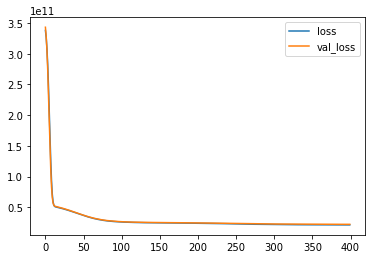

In [92]:
plt.figure(figsize=(10,8))
df_nn_train_hist.plot()

* **VERY IMPORTANT:** The fact that the *val_loss* curve is not going up after a certain number of epochs means that the model is *not* overfitting. It keeps steadily declining in this example, but in practice overfitting could occur.

* In view of the previous note, Portilla mentions that we'll later see an example where the model starts to overfit, and why it's good to implement early stopping conditions as a precaution.



### b) Error metrics

* Let's look at error metrics. Other than the MSE and the *mean_absolute_error*, we'll also look at the ***explained_variance_score***.

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [94]:
# Predict on the test set:
y_pred = nn_houses.predict(X_test)


# Print prediction errors:
print("ERRORS ON PREDICTIONS FROM TEST DATA:")
print(f"Mean Abs. Err. = {mean_absolute_error(y_test, y_pred)}")
print(f"Rt. Mean Squ. Err. = {np.sqrt(mean_squared_error(y_test, y_pred))}")



ERRORS ON PREDICTIONS FROM TEST DATA:
Mean Abs. Err. = 99895.92616791699
Rt. Mean Squ. Err. = 149091.70165559495


* This is quite a bad model. The mean abs. error is off by $100k and the root mean squared error is even larger. If we compare this with the average price of a house, we see that we're off by 20\%:

In [95]:
np.average(y_train)

515972.40652144863

* Another metric used is this *explained_variance_score*. Portilla doesn't go into the details, and the documentation only says that the highest score is 1.

* Could maybe enhance model by training it for longer.


In [96]:
explained_variance_score(y_test, y_pred)

0.7306458004999817

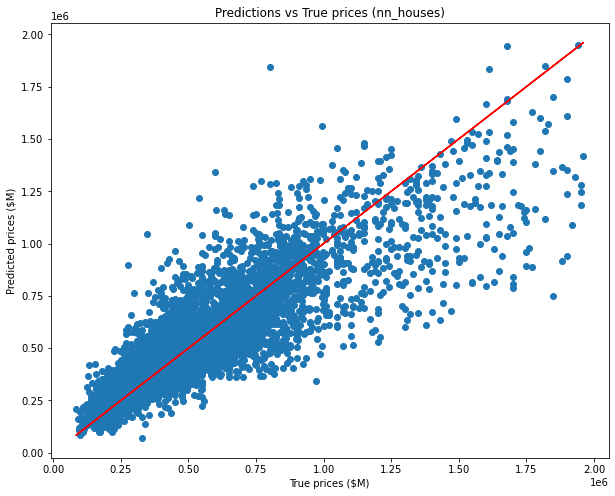

In [108]:
plt.figure(figsize=(10,8))
plt.title("Predictions vs True prices (nn_houses)")
plt.xlabel("True prices ($M)")
plt.ylabel("Predicted prices ($M)")
plt.scatter(x = y_test, y = y_pred)
plt.plot(y_test, y_test, color = "red")

* **Using the model:** Again, to use the trained neural network on a new house on the market:
    * We use the same scaler as for the training data on new data.
    * It's the same process as the introductory notes.
    
    
**Temporary conclusion (21/08/19):**

There are a lot of questions scattered over this notebook and the previous one on TF2.0 basics. I should:
1) Spend some time studying the architecture of TensorFlow.

2) Clarify good practices for building an appropriate neural network (no. of layers, types of activations etc.).

3) Revisit this Seattle housing example, and understand why the neural network here is so bad (it seems to predict well for price under \$1M, but underestimates above that value).

4) Saving the data scaler.